### Derive simulation ready climate forcings for DEMENTpy

By Bin Wang (UC Irvine|@bioatmo_sphere|wbwenwu@gmail.com)

16/04/2021
- - -

**Method**: Built on top of two preceding Notebooks--**soil_temperature.ipynb** (soil temperature generated and written in sites_temperature.csv) and **precipitation_vxx.ipynb** (water potential generated and written in gradient_psi.csv). And DEMENTpy input ready files are generated and saved in each of the five sites/folders.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 1.2.2
numpy version: 1.19.2
matplotlib version: 3.3.4


## load data

In [2]:
potential = pd.read_csv('precipitation/gradient_psi.csv',index_col=0)
potential.head()

,desert,scrubland,grassland,pineoak,subalpine
0,-1.152823,-1.159020,-0.699744,-0.729317,-0.575006
1,-0.078544,-1.003613,-0.590705,-0.063879,-0.705032
2,-0.959425,-0.594816,-0.523555,-0.573102,-1.032485
3,-0.290003,-0.243831,-0.491047,-0.083089,-0.749202
4,-0.057343,-0.135734,-0.482708,-0.436130,-0.274492


In [3]:
psi = potential.iloc[0:365,]
psi.head()

,desert,scrubland,grassland,pineoak,subalpine
0,-1.152823,-1.159020,-0.699744,-0.729317,-0.575006
1,-0.078544,-1.003613,-0.590705,-0.063879,-0.705032
2,-0.959425,-0.594816,-0.523555,-0.573102,-1.032485
3,-0.290003,-0.243831,-0.491047,-0.083089,-0.749202
4,-0.057343,-0.135734,-0.482708,-0.436130,-0.274492


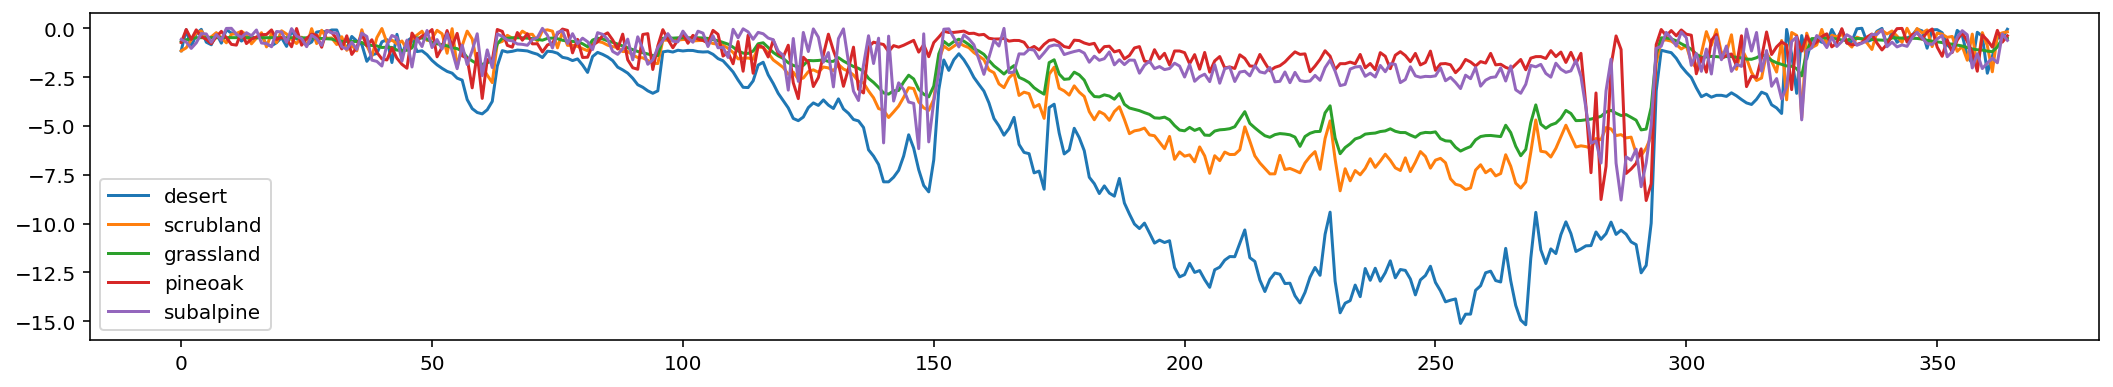

In [4]:
psi.plot(figsize=(18,3))
plt.show()

In [5]:
temp = pd.read_csv('soil_temperature/sites_temperature.csv',index_col=0)
temp.head()

,desert,scrubland,grassland,pineoak,subalpine
1,11.416667,4.000000,6.500000,0.250000,0.208333
2,9.958333,4.333333,9.000000,0.041667,0.125000
3,9.375000,5.250000,7.916667,-0.166667,0.125000
4,9.666667,9.291667,8.625000,2.000000,0.333333
5,13.916667,10.041667,12.583333,5.208333,0.791667


In [6]:
temp = temp.reset_index(drop=True)
temp

,desert,scrubland,grassland,pineoak,subalpine
0,11.416667,4.000000,6.500000,0.250000,0.208333
1,9.958333,4.333333,9.000000,0.041667,0.125000
2,9.375000,5.250000,7.916667,-0.166667,0.125000
3,9.666667,9.291667,8.625000,2.000000,0.333333
4,13.916667,10.041667,12.583333,5.208333,0.791667
...,...,...,...,...,...
360,8.791667,3.708333,8.458333,0.208333,0.250000
361,10.333333,4.791667,9.375000,0.250000,0.250000
362,13.416667,6.583333,11.125000,3.041667,0.250000
363,11.916667,5.791667,11.083333,3.791667,0.291667


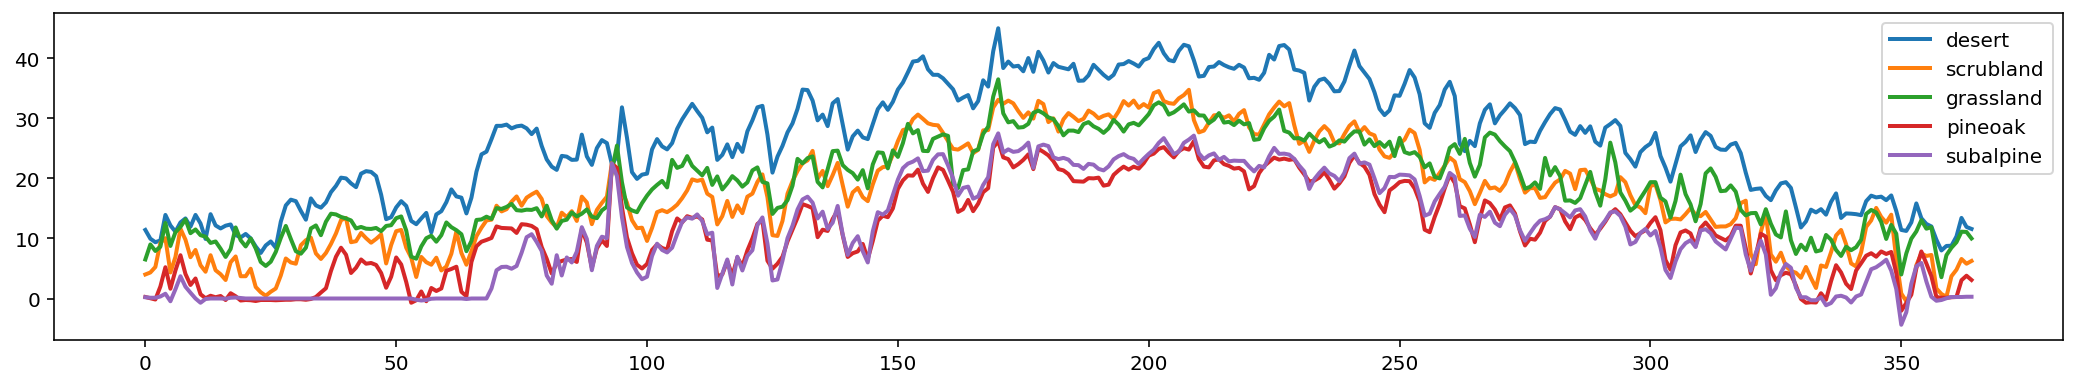

In [7]:
temp.plot(figsize=(18,3),linewidth=2)
plt.show()

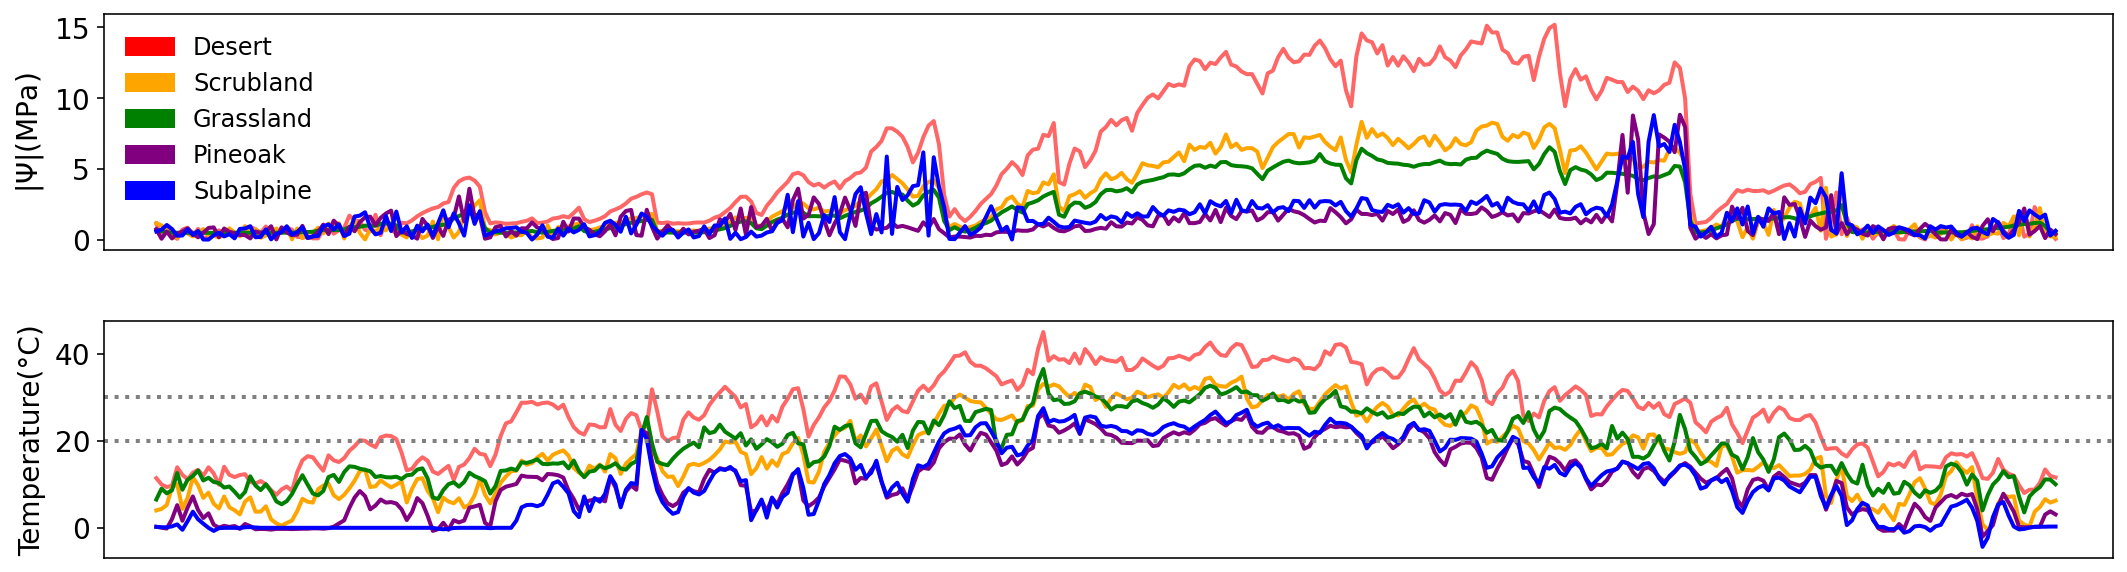

In [8]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(18,5))

#water potential
ax1.plot(abs(psi['desert']),color='red',linewidth=2,alpha=0.6)
ax1.plot(abs(psi['scrubland']),color='orange',linewidth=2)
ax1.plot(abs(psi['grassland']),color='green',linewidth=2)
ax1.plot(abs(psi['pineoak']),color='purple',linewidth=2)
ax1.plot(abs(psi['subalpine']),color='blue',linewidth=2)
ax1.set_ylabel('|$\Psi$|(MPa)',size=14)
ax1.set_xlim(-10,365+10)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)

#legend
red_patch    = mpatches.Patch(color='red',label='Desert')
orange_patch = mpatches.Patch(color='orange',label='Scrubland')
green_patch  = mpatches.Patch(color='green',label='Grassland')
purple_patch = mpatches.Patch(color='purple',label='Pineoak')
blue_patch   = mpatches.Patch(color='blue',label='Subalpine')
ax1.legend(handles=[red_patch,orange_patch, green_patch,purple_patch,blue_patch],fontsize=12,frameon=False)

#temperature
ax2.plot(temp['desert'],color='red',linewidth=2,alpha=0.6)    
ax2.plot(temp['scrubland'],color='orange',linewidth=2)
ax2.plot(temp['grassland'],color='green',linewidth=2)
ax2.plot(temp['pineoak'],  color='purple',linewidth=2)
ax2.plot(temp['subalpine'],color='blue',linewidth=2)
ax2.set_ylabel('Temperature(\u00B0C)',size=14)
ax2.set_xlim(-10,365+10)
ax2.tick_params(bottom=False,labelbottom=False, labelsize=14)    
ax2.axhline(y=20.0, linewidth=2,color='grey',linestyle=":")
ax2.axhline(y=30.0, linewidth=2,color='grey',linestyle=":")

plt.subplots_adjust(hspace=0.3)

#plt.savefig('gradient_forcing.svg',bbox_inches='tight')

plt.show()

### Create climate data for each site using a function "site_climate()"

In [9]:
def site_climate(site, temp, psi):
    
    site_climate = pd.concat([pd.Series(temp.tolist()), pd.Series(psi.tolist())], axis=1, ignore_index=False, sort=False)
    site_climate.columns = ['Temp', 'Psi']
    
    site_climate.to_csv("../"+site+"/climate.csv")

In [11]:
site_climate('desert', temp['desert'], psi['desert'])
site_climate('scrubland', temp['scrubland'], psi['scrubland'])
site_climate('grassland', temp['grassland'], psi['grassland'])
site_climate('pineoak', temp['pineoak'], psi['pineoak'])
site_climate('subalpine', temp['subalpine'], psi['subalpine'])